In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
data = pd.read_excel('Tips Quick EDA exercise v0.1 (5).xlsx')

In [41]:
data.head(), data.shape

(   total_bill   tip     sex smoker  day    time  size
 0       16.99  1.01  Female     No  Sun  Dinner   2.0
 1       10.34  1.66    Male     No  Sun  Dinner   3.0
 2       21.01  3.50    Male     No  Sun  Dinner   3.0
 3       23.68  3.31    Male     No  Sun  Dinner   2.0
 4       24.59  3.61  Female     No  Sun  Dinner   4.0,
 (245, 7))

In [42]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [43]:
data.isnull().sum()

total_bill    1
tip           1
sex           0
smoker        0
day           1
time          1
size          1
dtype: int64

In [44]:
clean_data = data.dropna()

In [45]:
clean_data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

#### What is the overall average tip

In [46]:
round(clean_data['tip'].mean(), 2)

3.0

#### Get a numerical summary for 'tip' - are the median and mean very different? What does this tell you about the field?

In [47]:
clean_data['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [48]:
clean_data['tip'].median()

2.9

Here we see that mean and median both are same. So we can say that data is symmetric and have zero skewness.

#### Prepare a boxplot for 'tip', are there any outliers?

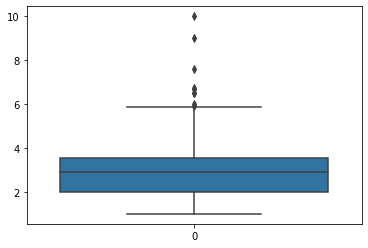

In [49]:
sns.boxplot(data = clean_data['tip'], orient = 'v')

Most of the tip is in the range 2-4 but there are few outliers as we can see

#### Prepare a boxplot for 'total_bill', are there any outliers?

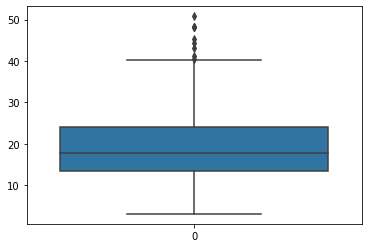

In [50]:
sns.boxplot(data = clean_data['total_bill'], orient= 'v')

There are few outliers here as well

#### Gender: what is the percent of females in the data? 

In [51]:
female_count = len(clean_data[(clean_data['sex'] == 'Female')])
female_count

87

In [52]:
male_count = len(clean_data[(clean_data['sex'] == 'Male')])
male_count
total_count = male_count + female_count
total_count

244

In [53]:
female_percent = round((female_count / total_count)*100 ,2)
female_percent

35.66

#### Prepare a bar plot with the bars representing the percentage of records for each gender.

In [54]:
count_data = clean_data.groupby(['sex']).count().reset_index()
count_data

,sex,total_bill,tip,smoker,day,time,size
0,Female,87,87,87,87,87,87
1,Male,157,157,157,157,157,157


In [55]:
count_data['count_percent'] = round((count_data['size']/ len(data)) *100 , 2)
count_data

,sex,total_bill,tip,smoker,day,time,size,count_percent
0,Female,87,87,87,87,87,87,35.51
1,Male,157,157,157,157,157,157,64.08


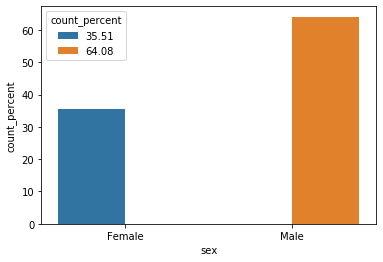

In [56]:
sns.barplot(x = 'sex' , y = 'count_percent',hue = 'count_percent', data = count_data)

#### Does the average tip differ by gender? Does one gender tip more than the other?

In [57]:
filter_data = clean_data.groupby(['sex'])
round(filter_data.mean()['tip'],2)


sex
Female    2.83
Male      3.09
Name: tip, dtype: float64

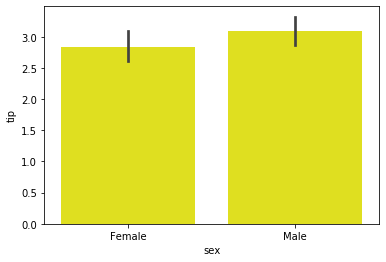

In [58]:
sns.barplot(x = 'sex',y = 'tip',data = clean_data, color = 'yellow')

Yes Average tip differ by gender.
Male tends to pay a bit more tip than Female

#### Does the average tip differ by the time of day?

In [59]:
day_time = clean_data.groupby(['day','time'])
round(day_time.mean()['tip'],2)

day   time  
Fri   Dinner    2.94
      Lunch     2.38
Sat   Dinner    2.99
Sun   Dinner    3.26
Thur  Dinner    3.00
      Lunch     2.77
Name: tip, dtype: float64

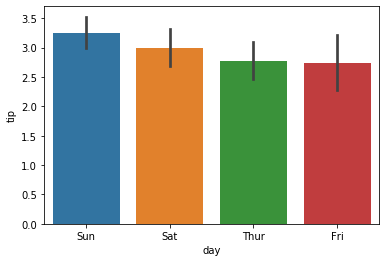

In [60]:
sns.barplot(x = 'day', y = 'tip', data=clean_data)

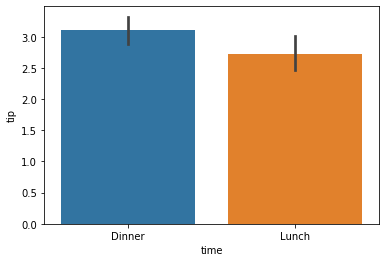

In [61]:
sns.barplot(x = 'time', y = 'tip', data=clean_data)

Yes the average tip differ by time of the day.

#### Does the average tip differ by size (number of people at the table)? 

In [62]:
avg_size = clean_data.groupby(['size'])
round(avg_size.mean()['tip'],2)

size
1.0    1.44
2.0    2.58
3.0    3.39
4.0    4.14
5.0    4.03
6.0    5.22
Name: tip, dtype: float64

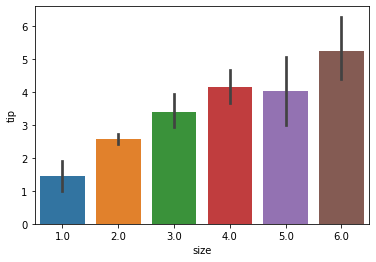

In [63]:
sns.barplot(x = 'size',y = 'tip',data = clean_data)

Yes the average tip differ by the size (number of people at the table)

#### Do smokers tip more than non-smokers?

In [64]:
clean_data.groupby('smoker').sum()['tip']

smoker
No     451.77
Yes    279.81
Name: tip, dtype: float64

No Non-Smoker tip more than Smokers.

#### Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most?

In [65]:
clean_data.groupby(['sex','smoker']).mean()['tip']

sex     smoker
Female  No        2.773519
        Yes       2.931515
Male    No        3.113402
        Yes       3.051167
Name: tip, dtype: float64

Non-Smoker male tips the most.

#### Create a new metric called 'pct_tip' = tip/ total_bill - this would be percent tip give, and should be a better measure of the tipping behaviour.


In [66]:
clean_data['pct_tip'] = clean_data['tip']/clean_data['total_bill']
clean_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2.0,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3.0,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3.0,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2.0,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4.0,0.146808


#### Does pct_tip differ by gender? Does one gender tip more than the other?

In [67]:
clean_data.groupby(['sex']).sum()['pct_tip']

sex
Female    14.484694
Male      24.751136
Name: pct_tip, dtype: float64

Yes the pct_tip differs by Gender

#### Does pct_tip differ by size (number of people at the table)? 

In [68]:
clean_data.groupby(['size']).mean()['pct_tip']

size
1.0    0.217292
2.0    0.165719
3.0    0.152157
4.0    0.145949
5.0    0.141495
6.0    0.156229
Name: pct_tip, dtype: float64

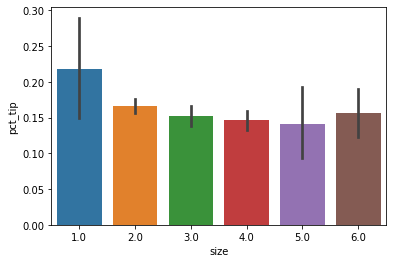

In [69]:
sns.barplot(x = 'size', y = 'pct_tip', data = clean_data)

#### Make the gender vs. smoker view using pct_tip  - does your inference change?

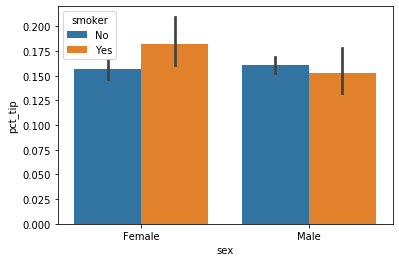

In [70]:
clean_data['sex'].groupby(clean_data['smoker']).value_counts(normalize = True).rename('pct_tip').reset_index()
sns.barplot(x ='sex', y ='pct_tip',hue='smoker',data= clean_data)

Now we can see that Female smoker gives more pct_tip.

#### Make a scatter plot of total_bill vs. tip.

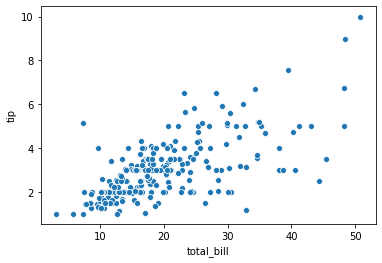

In [71]:
sns.scatterplot(x='total_bill', y='tip',data= clean_data)

#### Make a scatter plot of total_bill vs. pct_tip.

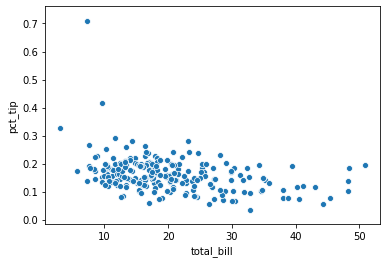

In [72]:
sns.scatterplot(x = 'total_bill', y='pct_tip',data = clean_data)